## Pattern Recognition Assignment -2

<br> by Siddhant Verma - 2K18/EC/167

#### Question 2 

This repository contains the dataset

In [61]:
cd ./datasets/

[Errno 2] No such file or directory: './datasets/'
/mnt/c/Users/siddh/ML_lab/PR-assignment-2/datasets


In [62]:
ls

 Index*        bezdekIris.data*   iris.names*     sat.trn*
'Index (1)'*   iris.data*        'sat (1).doc'*   sat.tst*


In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from scipy.spatial.distance import cdist
import math

### Loading the dataset

In [64]:
# load iris dataset
iris = datasets.load_iris()


# Since this is a bunch, create a dataframe
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [65]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:>

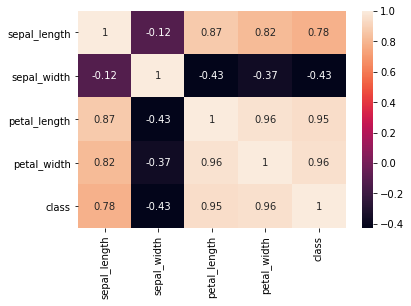

In [67]:
sns.heatmap(iris_df.corr(), annot = True, linecolor='black')

In [68]:
iris_df.shape

(150, 5)

In [69]:
X = iris_df.iloc[:,:4]
Y = iris_df.iloc[:,4]

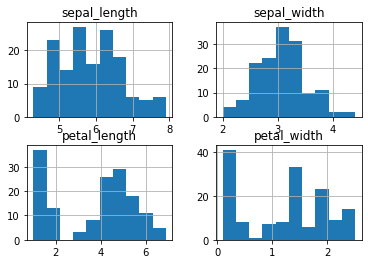

In [70]:
X.hist()
plt.show()

### Test Train split

In [71]:
xtrain, xval, ytrain, yval = train_test_split(X,Y, test_size=0.3, random_state=42)

Text(0.5, 1.0, 'The dataset')

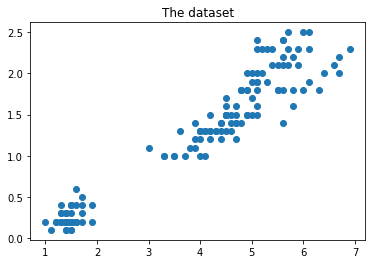

In [100]:
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width)
plt.title("The dataset")

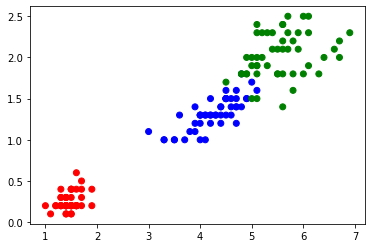

In [103]:
color =np.array(['red','blue','green'])

plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color[iris.target])

### Elbow Method

Text(0, 0.5, 'SSE')

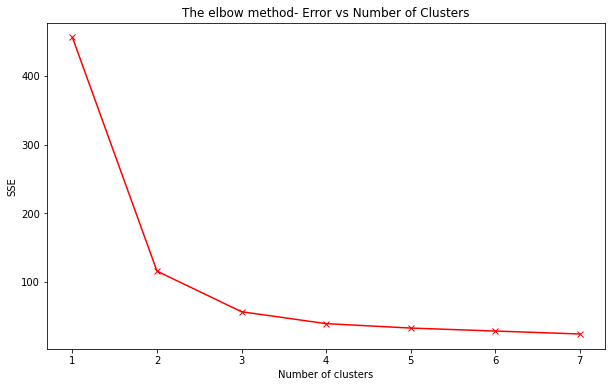

In [82]:
sse=[] #sum of squared error

# Finding inertia on various k values
for i in range(1,8):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0).fit(xtrain)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), sse, 'bx-', color='red')
plt.title('The elbow method- Error vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') 

### The optimal value for number of clusters is 3.

In [141]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [106]:
kmeans.cluster_centers_

array([[5.79555556, 2.69555556, 4.34444444, 1.41777778],
       [4.96451613, 3.37741935, 1.46451613, 0.2483871 ],
       [6.85517241, 3.10344828, 5.70689655, 2.02068966]])

###  Scatter Plot Visualisations

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

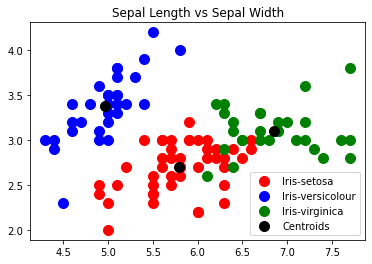

In [107]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()
plt.title('Sepal Length vs Sepal Width')

In [125]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

predictedy = kmeans.fit_predict(xtrain)

In [126]:
metrics.accuracy_score(predictedy, ytrain)

0.24761904761904763

In [131]:
con_matrix = metrics.confusion_matrix(ytrain, predictedy)
print(con_matrix)


[[ 0 31  0]
 [34  0  3]
 [11  0 26]]


In [134]:
def draw_confusionmatrix(ytest, yhat):
 plt.figure(figsize=(10,7))
 cm = metrics.confusion_matrix(ytest, yhat)
 ax = sns.heatmap(cm, annot=True, fmt="d")
 plt.ylabel('True label')
 plt.xlabel('Predicted label')


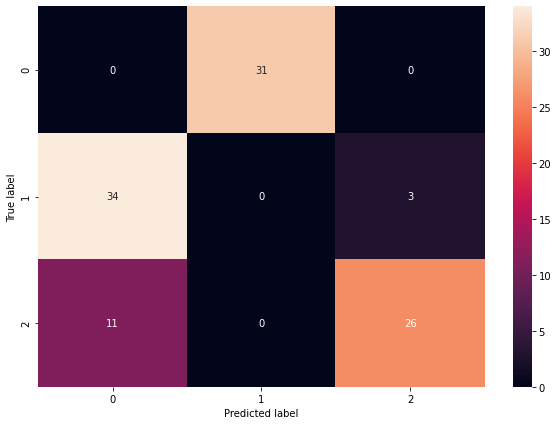

In [135]:
draw_confusionmatrix(ytrain, predictedy)


In [136]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

predictedy = kmeans.fit_predict(xval)

In [137]:
metrics.accuracy_score(predictedy, yval)

0.9333333333333333

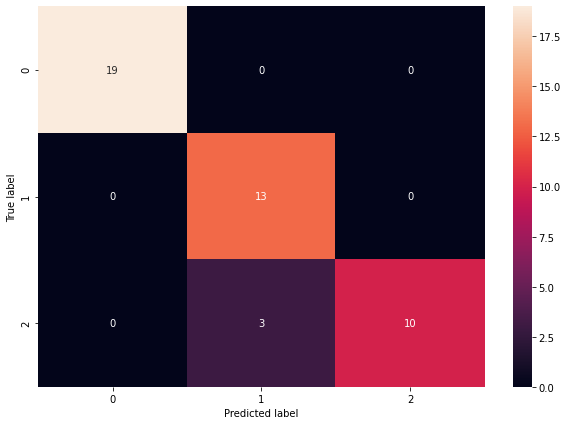

In [140]:
draw_confusionmatrix(yval, predictedy)